IMDB-Senti: A nuance handling sentiment analysis on Movie Reviews

In [ ]:
#Connecting the collab notebook to our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries required to execute our project
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer #Converts raw data into TF-IDF Features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import re #ReGEX module - to deal with regular expressions
import nltk #Natural Language tool kit - to deal with human language
from nltk.tokenize import word_tokenize #splits sentence into words


import tensorflow as tf #develop neural networks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #ensures input sentences have same length after padding
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout #layers in cnn
from tensorflow.keras.models import Sequential #arranging layers in sequences
from tensorflow.keras.utils import to_categorical #converts class vectors(int) into binary


In [ ]:
# Loading the IMDB Movie reviews data set and pointing them to a variable
file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Train.csv')
data = pd.read_csv(file_path) #storing the path into another variable

In [ ]:
# using .head() to display few rows of data
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
#printing the information of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
#checking for duplicate elements in the data
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [ ]:
#returning an int representing the number of axes / array dimensions. Return 1 if Series. Otherwise return 2
data.ndim

2

In [ ]:
# descrbing the data in the dataframe
data.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

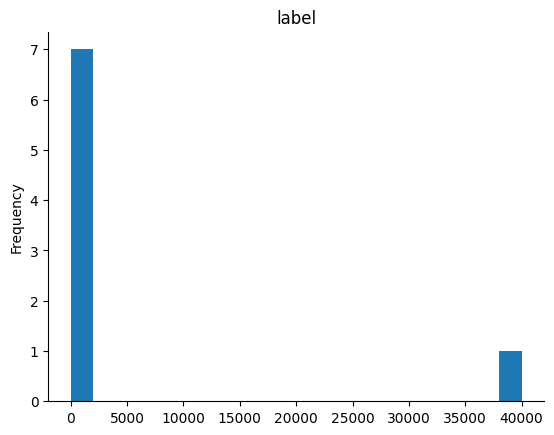

In [ ]:
from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt #to plot the data into figures

import seaborn as sns #to make statistical graphs

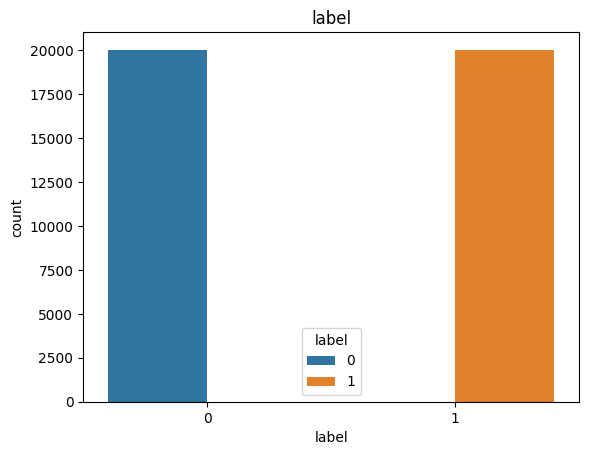

In [ ]:
#label encoding
cat=["label"]
data_cat = data.loc[:, cat]
for i in cat:
    plt.figure()
    sns.countplot(x = i, data = data_cat,hue = "label")
    plt.title(i)

<Axes: >

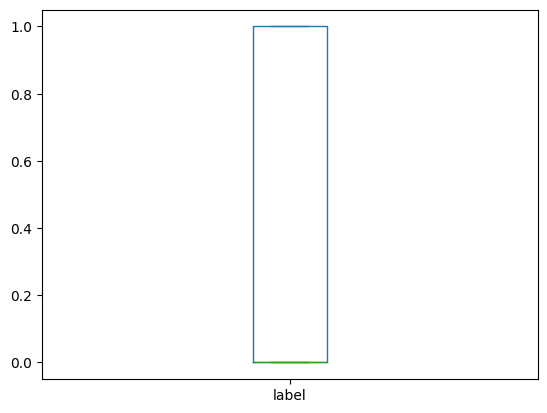

In [ ]:
# creating a box plot
data.label.plot.box()

<Axes: ylabel='Density'>

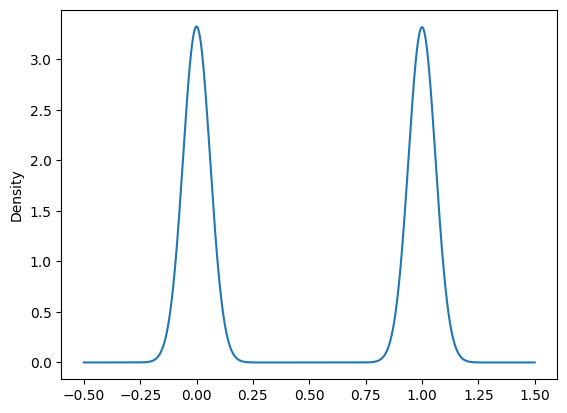

In [ ]:
#creating a density plot
data.label.plot.density()

<Axes: >

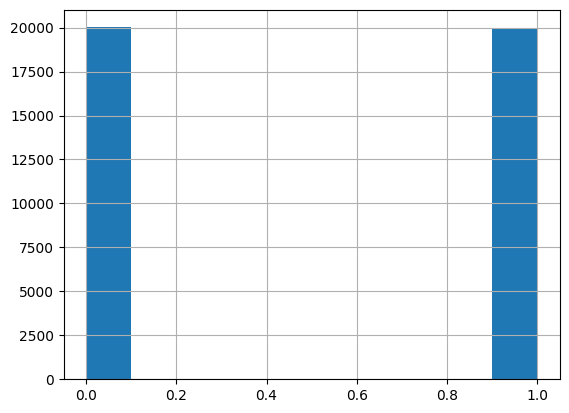

In [ ]:
#creating a histogram
data.label.hist()

In [ ]:
#finding the correlation value
correlation_matrix = data.corr()

correlation_matrix['label'].sort_values(ascending = False)

<ipython-input-18-97db835eb1ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


label    1.0
Name: label, dtype: float64

<ipython-input-19-eb3c481a8ac2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


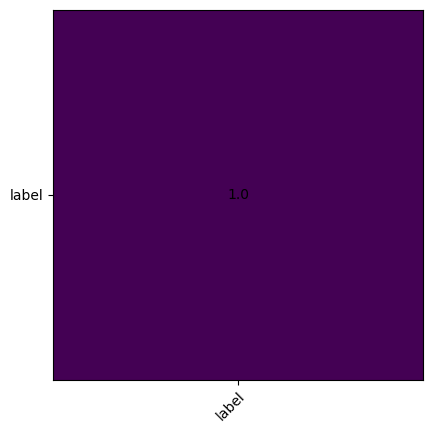

In [ ]:
# Demonstrating the generation of heatmap using matplotlib to get correlation matrix
corr = data.corr()
fig, ax = plt.subplots()

# creating a heatmap
im = ax.imshow(corr.values)

# setting the labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# we can Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#we can Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
    text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2), ha="center", va="center", color="black")

<ipython-input-20-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

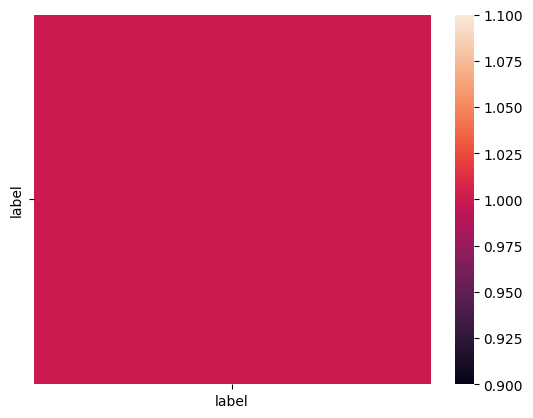

In [ ]:
sns.heatmap(data.corr())

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize

# Downloading the 'punkt' resource- tokenizer-using unsupervised algorithm- abbreviations,collocation..
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Defining a function for cleaning the text

def clean_text(text):

    # Removing special characters, numbers and extra whitespaces
    text = re.sub(r'[^A-Za-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Converting to lowercase
    text = text.lower()
    return text

# Applying text cleaning to the 'text' column (which contains the movie reviews)
data['text'] = data['text'].apply(clean_text)


# Tokenizing the text
data['tokens'] = data['text'].apply(lambda x: word_tokenize(x))


# Checking the cleaned and tokenized data
data.head()


,text,label,tokens
0,i grew up b watching and loving the thunderbir...,0,"[i, grew, up, b, watching, and, loving, the, t..."
1,when i put this movie in my dvd player and sat...,0,"[when, i, put, this, movie, in, my, dvd, playe..."
2,why do people who do not know what a particula...,0,"[why, do, people, who, do, not, know, what, a,..."
3,even though i have great interest in biblical ...,0,"[even, though, i, have, great, interest, in, b..."
4,im a die hard dads army fan and nothing will e...,1,"[im, a, die, hard, dads, army, fan, and, nothi..."


from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='label', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Loading the 'train.csv' dataset
train_file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Train.csv') #setting the path

train_data = pd.read_csv(train_file_path) #storing the path

# Extracting features and labels from the 'train.csv' dataset

X_train_text = train_data['text']

y_train = train_data['label']

# Creating a TF-IDF vectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjusting max_features as needed

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# Creating and training a Logistic Regression model

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Loading the 'test.csv' dataset for evaluating

test_file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Test.csv')
test_data = pd.read_csv(test_file_path)

# Extracting features and labels from the 'test.csv' dataset

X_test_text = test_data['text']

y_test = test_data['label']

# Transforming the test data using the same TF-IDF vectorizer

X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Predicting sentiment labels on the test set

y_pred = logistic_regression_model.predict(X_test_tfidf)

# Calculating accuracy

lr_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {lr_accuracy}")

Accuracy: 0.8724


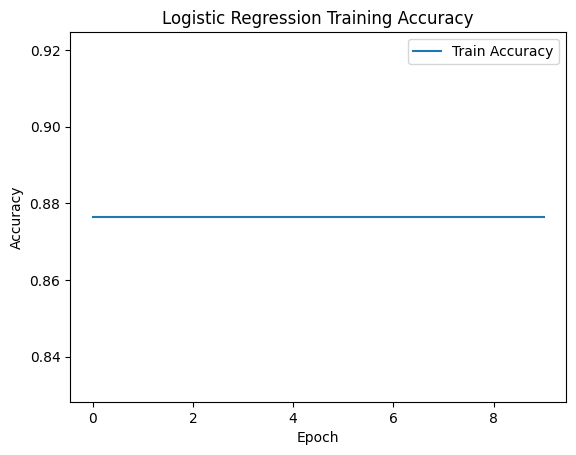

In [ ]:
# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Training loop to collect metrics
epochs = 10
train_loss = []
train_accuracy = []

for epoch in range(epochs):
    logistic_regression_model.fit(X_train_tfidf, y_train)
    y_pred = logistic_regression_model.predict(X_train_tfidf)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_train, y_pred)
    train_accuracy.append(accuracy)

# Plotting the accuracy curve
plt.plot(train_accuracy, label='Train Accuracy')
plt.title('Logistic Regression Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_train and y_pred are the true labels and predicted labels, respectively, for Logistic Regression
classification_report_lr = classification_report(y_train[:len(y_pred)], y_pred)
print("Logistic Regression Classification Report:")
print(classification_report_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     20019
           1       0.87      0.89      0.88     19981

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



In [ ]:
!pip install tensorflow

In [ ]:
# Importing the required libraries for cnn model

import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Loading the 'train.csv' dataset

train_file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Train.csv') #setting the path
train_data = pd.read_csv(train_file_path)

# Extracting features (movie reviews) and labels from the datasets

X_train = train_data['text']
y_train = train_data['label']

# Converting labels to one-hot encoding
y_train = to_categorical(y_train)

# Tokenizing and padding the sequences (adjusting max_sequence_length as needed)

max_sequence_length = 100  # we Adjust this based on our data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)

# Building the CNN model

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming two classes (positive and negative)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing model summary
print(model.summary())

# Training the model

epochs = 5  # Adjusting the number of epochs as needed
batch_size = 64  # Adjusting the batch size as needed

model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          11220400  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 128)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2432)              0         
                                                                 
 dense (Dense)               (None, 128)               311424    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
import pandas as pd

# Loading the 'test.csv' dataset

test_file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Test.csv')
test_data = pd.read_csv(test_file_path)

# Extracting features (movie reviews) and labels from the test dataset

X_test = test_data['text']
y_test = test_data['label']

# Preprocessing the test data (tokenizing and padding)

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encoding the labels for the test data

y_test_encoded = to_categorical(y_test)

# Evaluating the model on the test set

loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)

print(f'Test loss: {loss}') #checking loss
print(f'Test accuracy: {accuracy}') #calculating accuracy

157/157 [==============================] - 2s 11ms/step - loss: 0.8380 - accuracy: 0.8480
Test loss: 0.8379800915718079
Test accuracy: 0.8479999899864197


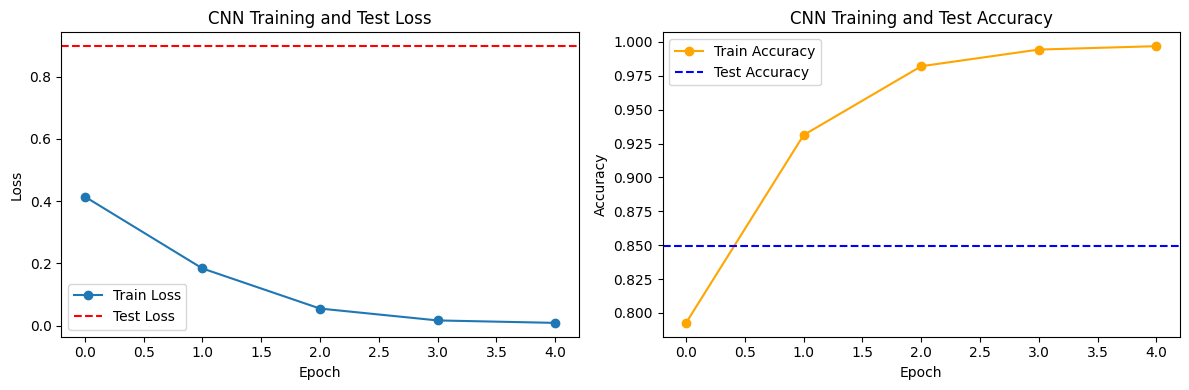

In [ ]:
import matplotlib.pyplot as plt

# Replace these lists with your actual loss and accuracy values
train_loss_cnn = [0.4148, 0.1840, 0.0551, 0.0170, 0.0091]
train_accuracy_cnn = [0.7926, 0.9313, 0.9821, 0.9944, 0.9969]

# Replace these values with your actual test loss and accuracy
test_loss_cnn = 0.8981425762176514
test_accuracy_cnn = 0.8489999771118164

# Plotting the loss and accuracy curves for CNN
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_loss_cnn, label='Train Loss', marker='o')
plt.axhline(y=test_loss_cnn, color='red', linestyle='--', label='Test Loss')
plt.title('CNN Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_cnn, label='Train Accuracy', marker='o', color='orange')
plt.axhline(y=test_accuracy_cnn, color='blue', linestyle='--', label='Test Accuracy')
plt.title('CNN Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred_cnn = model.predict(X_test_padded)

# Convert predictions to labels
y_pred_labels = y_pred_cnn.argmax(axis=1)
y_true_labels = y_test_encoded.argmax(axis=1)  # Convert one-hot encoded to labels

# Generate classification report
classification_report_cnn = classification_report(y_true_labels, y_pred_labels)
print("CNN Classification Report:")
print(classification_report_cnn)

157/157 [==============================] - 2s 14ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2495
           1       0.87      0.82      0.84      2505

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



NAIVE BAYES

In [ ]:
#Naive Bayes
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Train.csv')


X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


X_train = X_train.apply(word_tokenize)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.apply(' '.join))

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


with open('new_picklee.pkl', 'wb') as file:
    pickle.dump((nb_classifier, tfidf_vectorizer), file)


X_test_tokens = X_test.apply(word_tokenize)
X_test_strings = X_test_tokens.apply(' '.join)
X_test_tfidf = tfidf_vectorizer.transform(X_test_strings)


y_pred = nb_classifier.predict(X_test_tfidf)


accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model Accuracy: 0.8515


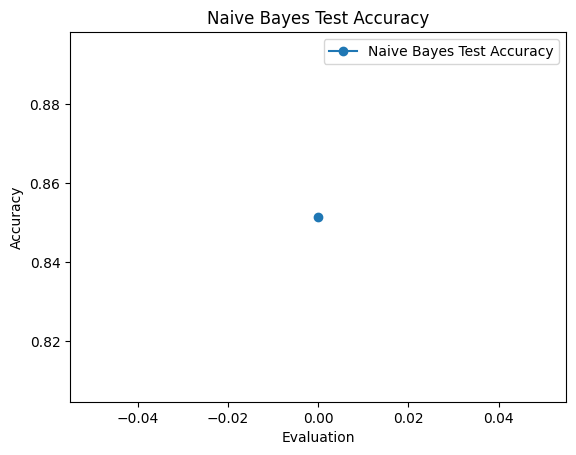

In [ ]:
import matplotlib.pyplot as plt

test_accuracy_nb = [accuracy]

# Plotting the accuracy curve for Naive Bayes
plt.plot(test_accuracy_nb, label='Naive Bayes Test Accuracy', marker='o')
plt.title('Naive Bayes Test Accuracy')
plt.xlabel('Evaluation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
classification_report_nb = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_report_nb)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3966
           1       0.85      0.85      0.85      4034

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



In [ ]:
import pandas as pd

# Assuming you have the accuracy values for each model
# Replace these with your actual accuracy values
accuracy_values = {
    'Logistic Regression': 0.8724,
    'CNN': 0.8490,
    'Naive Bayes': 0.8515,
}

# Create a DataFrame from the accuracy values
accuracy_df = pd.DataFrame(list(accuracy_values.items()), columns=['Model', 'Accuracy'])

# Print the comparison table
print("Accuracy Comparison Table:")
print(accuracy_df)

Accuracy Comparison Table:
                 Model  Accuracy
0  Logistic Regression    0.8724
1                  CNN    0.8490
2          Naive Bayes    0.8515


Epoch 1/5
500/500 [==============================] - 165s 327ms/step - loss: 0.4379 - accuracy: 0.7811 - val_loss: 0.3101 - val_accuracy: 0.8643
Epoch 2/5
500/500 [==============================] - 157s 314ms/step - loss: 0.1952 - accuracy: 0.9267 - val_loss: 0.3442 - val_accuracy: 0.8611
Epoch 3/5
500/500 [==============================] - 164s 328ms/step - loss: 0.0631 - accuracy: 0.9784 - val_loss: 0.4791 - val_accuracy: 0.8476
Epoch 4/5
500/500 [==============================] - 160s 320ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.6897 - val_accuracy: 0.8487
Epoch 5/5
157/157 [==============================] - 2s 12ms/step - loss: 0.8721 - accuracy: 0.8422


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


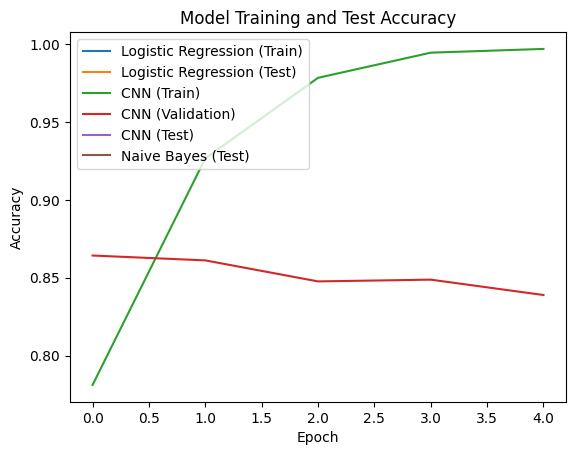

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
from nltk.tokenize import word_tokenize

# Load the 'train.csv' dataset
train_file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Train.csv')
train_data = pd.read_csv(train_file_path)

# Extract features and labels from the 'train.csv' dataset
X_train_text = train_data['text']
y_train = train_data['label']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# Create and train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Save the history of Logistic Regression model
lr_history = {'accuracy': [accuracy_score(y_train, logistic_regression_model.predict(X_train_tfidf))]}

# Load the 'test.csv' dataset for evaluation
test_file_path = ('/content/drive/MyDrive/CAPSTONE PROJECT/IMDB Dataset/Test.csv')
test_data = pd.read_csv(test_file_path)

# Extract features and labels from the 'test.csv' dataset
X_test_text = test_data['text']
y_test = test_data['label']

# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Predict sentiment labels on the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Save the history of Logistic Regression model for test set
lr_history['test_accuracy'] = [accuracy_score(y_test, y_pred)]

# Build the CNN model
max_sequence_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(2, activation='softmax'))  # Assuming two classes (positive and negative)

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save the history of CNN model
cnn_history = cnn_model.fit(X_train_padded, to_categorical(y_train), epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the CNN model on the test set
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode the labels for the test data
y_test_encoded = to_categorical(y_test)

cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_padded, y_test_encoded)

# Save the history of CNN model for test set
cnn_history.history['test_accuracy'] = [cnn_test_accuracy]

# Naive Bayes
nltk.download('punkt')
X_train_tokens = X_train_text.apply(word_tokenize)
X_train_strings = X_train_tokens.apply(' '.join)
X_train_tfidf = tfidf_vectorizer.transform(X_train_strings)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

with open('new_picklee.pkl', 'wb') as file:
    pickle.dump((nb_classifier, tfidf_vectorizer), file)

# Save the history of Naive Bayes model
X_test_tokens = X_test_text.apply(word_tokenize)
X_test_strings = X_test_tokens.apply(' '.join)
X_test_tfidf = tfidf_vectorizer.transform(X_test_strings)

y_nb_pred = nb_classifier.predict(X_test_tfidf)

# Save the history of Naive Bayes model for test set
nb_history = {'test_accuracy': [accuracy_score(y_test, y_nb_pred)]}

# Plotting the accuracy curve
plt.plot(lr_history['accuracy'], label='Logistic Regression (Train)')
plt.plot(lr_history['test_accuracy'], label='Logistic Regression (Test)')
plt.plot(cnn_history.history['accuracy'], label='CNN (Train)')
plt.plot(cnn_history.history['val_accuracy'], label='CNN (Validation)')
plt.plot(cnn_history.history['test_accuracy'], label='CNN (Test)')
plt.plot(nb_history['test_accuracy'], label='Naive Bayes (Test)')

plt.title('Model Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!pip install ipywidgets #installing interacting HTML widgets for creating GUI

import ipywidgets as widgets #creates dynamic interface

from IPython.display import display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Defining the logistic regression model and TF-IDF vectorizer

logistic_regression_model = logistic_regression_model  # Assigning our trained model
tfidf_vectorizer = tfidf_vectorizer  # Assigning our TF-IDF vectorizer

# Creating text input and output widgets
input_text = widgets.Textarea(
    value='',
    placeholder='Enter your movie review here...',
    description='Review:',
    disabled=False
)
output_text = widgets.Output()

# Creating a prediction function

def analyze_sentiment(sender):
    review = [input_text.value]
    review_tfidf = tfidf_vectorizer.transform(review)

    sentiment = logistic_regression_model.predict(review_tfidf)

    if sentiment[0] == 1:
        result = "Positive"
    else:
        result = "Negative"

    with output_text:
        output_text.clear_output()
        print(f"Sentiment: {result}")

# Creating a "Clear" button to clear the input and output

clear_button = widgets.Button(description="Clear Input & Output")

def clear_input_output(sender):
    input_text.value = ''  # Clear the input text
    with output_text:
        output_text.clear_output()  # Clear the output text

clear_button.on_click(clear_input_output)

# Creating an "Analyze" button to trigger the sentiment analysis

analyze_button = widgets.Button(description="Analyze Sentiment")
analyze_button.on_click(analyze_sentiment)

# Displaying the widgets
display(input_text, analyze_button, clear_button, output_text)


Textarea(value='', description='Review:', placeholder='Enter your movie review here...')

Button(description='Analyze Sentiment', style=ButtonStyle())

Button(description='Clear Input & Output', style=ButtonStyle())

Output()